In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('Project_Hypertensio-heartdisease-1 (1).csv')

In [3]:
# view dataset
df.head()

,HeartDisease-Hypertension),BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Tribe
0,No,16.60,Yes,No,No,3,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes,Yoruba
1,No,20.34,No,No,Yes,0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No,Yoruba
2,No,26.58,Yes,No,No,20,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No,Yoruba
3,No,24.21,No,No,No,0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes,Yoruba
4,No,23.71,No,No,No,28,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No,Yoruba


In [4]:
# highlight view of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HeartDisease-Hypertension)  319795 non-null  object 
 1   BMI                         319795 non-null  float64
 2   Smoking                     319795 non-null  object 
 3   AlcoholDrinking             319795 non-null  object 
 4   Stroke                      319790 non-null  object 
 5   PhysicalHealth              319795 non-null  int64  
 6   MentalHealth                319794 non-null  float64
 7   DiffWalking                 319795 non-null  object 
 8   Sex                         319791 non-null  object 
 9   AgeCategory                 319795 non-null  object 
 10  Diabetic                    319781 non-null  object 
 11  PhysicalActivity            319784 non-null  object 
 12  GenHealth                   319795 non-null  object 
 13  SleepTime     

In [5]:
# drop rows where BMI is greater than 45 and less than 17
df = df[(df['BMI'] >= 17) & (df['BMI'] <= 45)]

In [6]:
df.isnull().sum()

,0
HeartDisease-Hypertension),0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,5
PhysicalHealth,0
MentalHealth,1
DiffWalking,0
Sex,4
AgeCategory,0


In [7]:
# Bin BMI to categories
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

In [8]:
# drop rows with missing values
df = df.dropna()

In [9]:
mapping = {'No, borderline diabetes': 'No', 'Yes (during pregnancy)': 'Yes'}
df['Diabetic'] = df['Diabetic'].map(mapping).fillna(df['Diabetic'])

# Exploratory Data Analysis

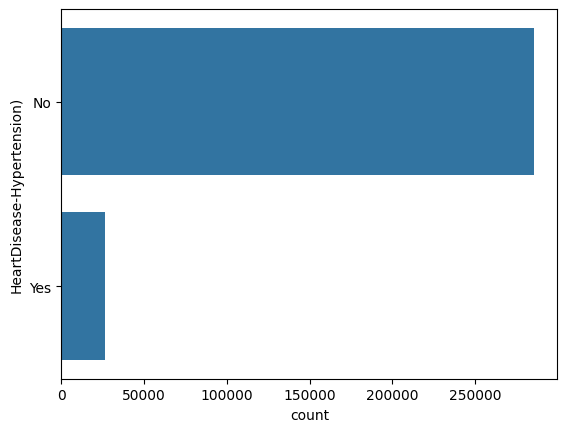

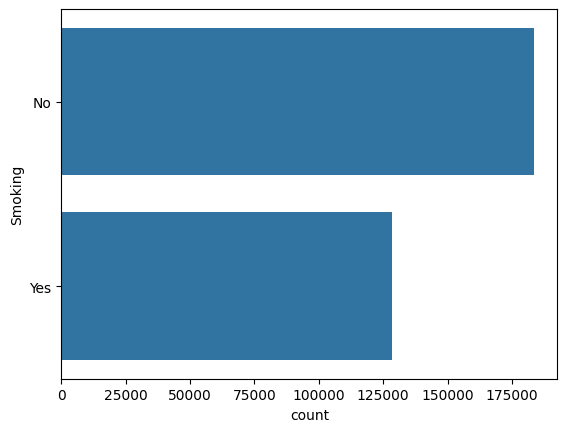

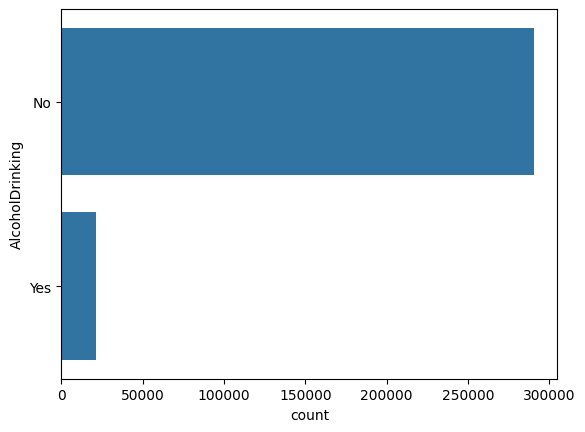

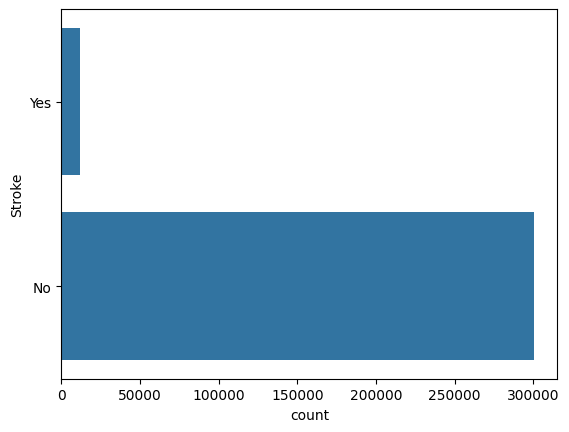

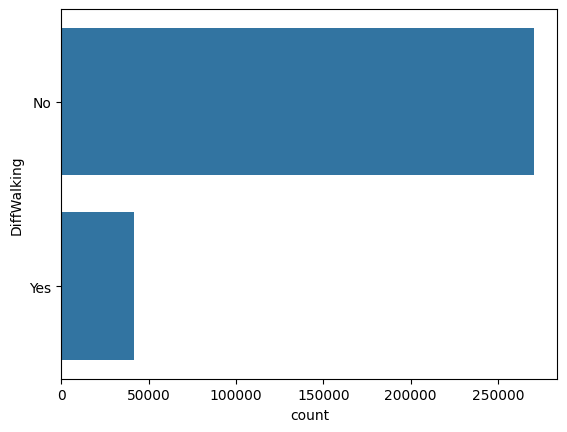

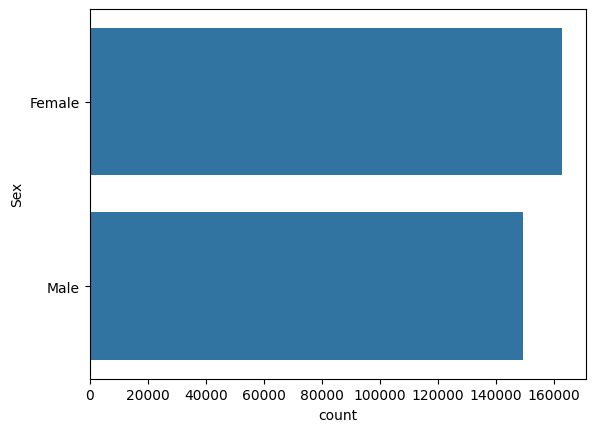

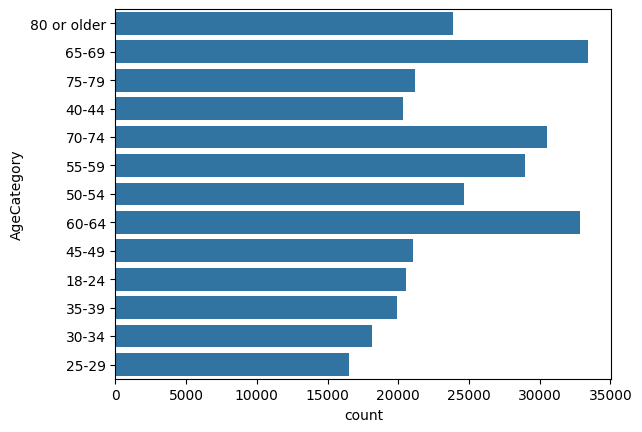

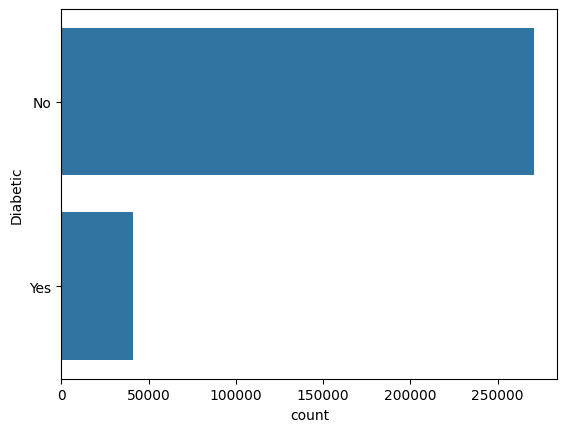

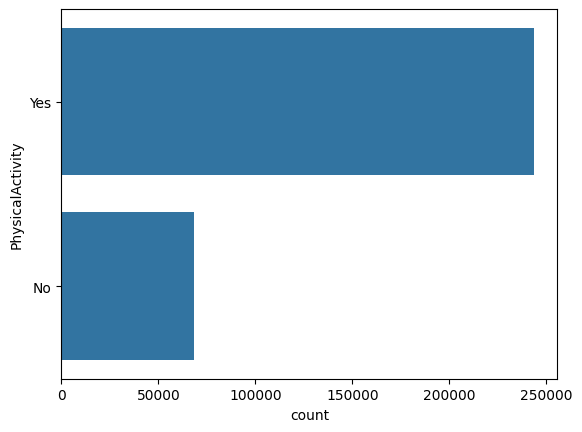

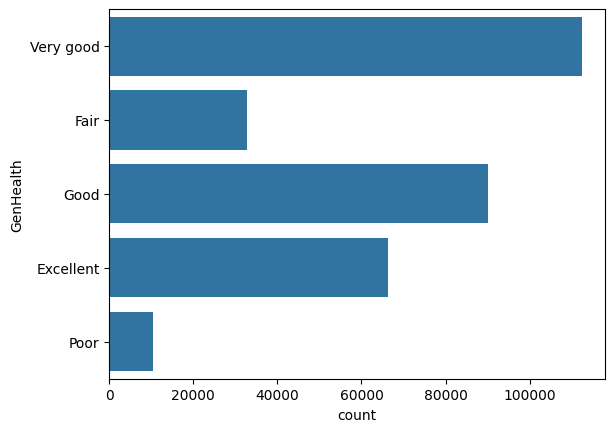

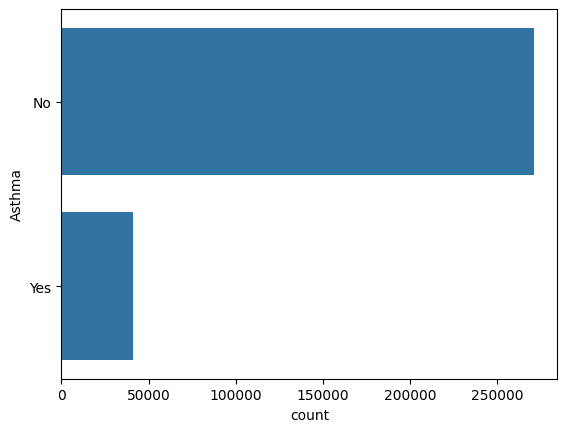

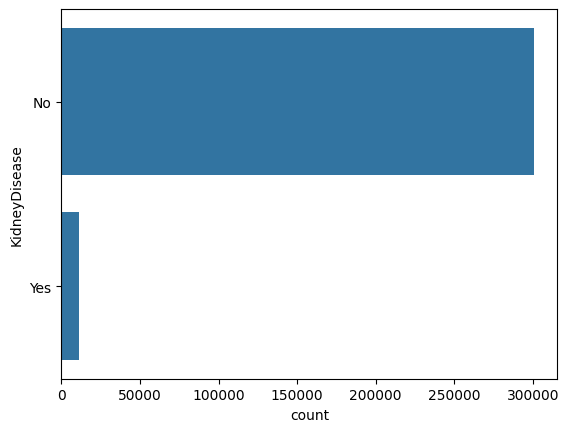

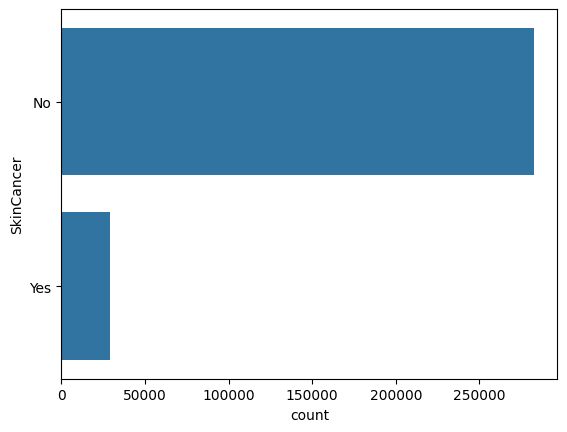

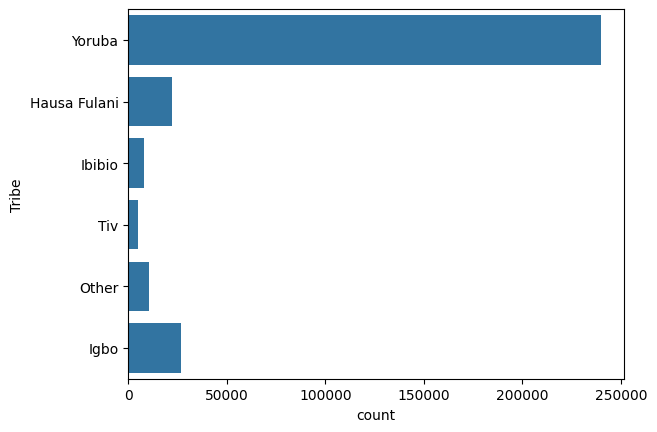

In [10]:
# select columnns with object data type
cat_col = df.select_dtypes(include=['object']).columns

# plot bar chart for each columns
for col in cat_col:
  sns.countplot(y=col, data=df)
  plt.show()

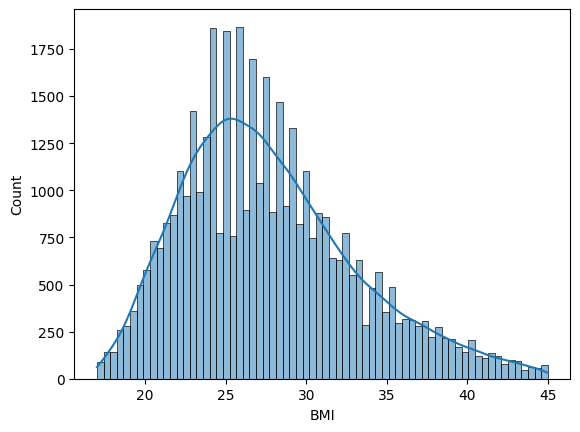

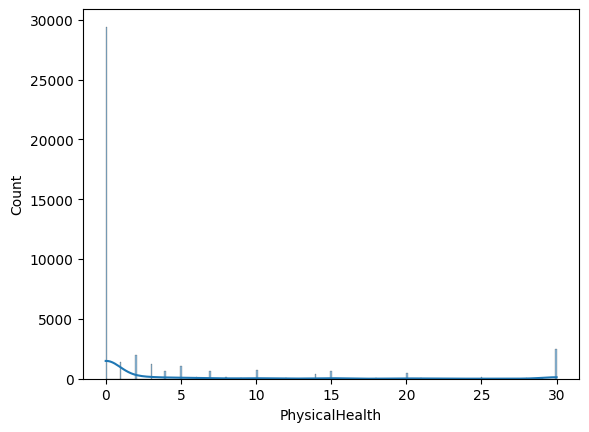

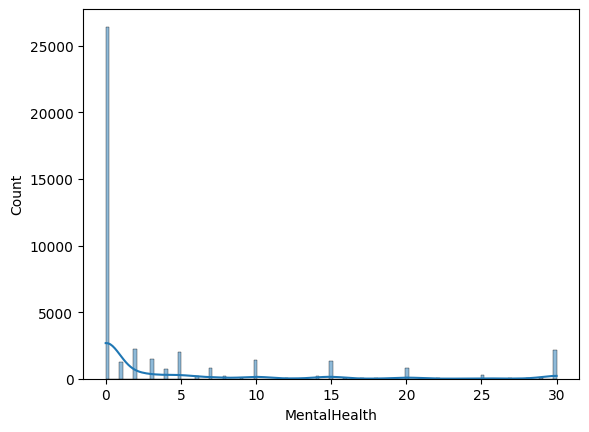

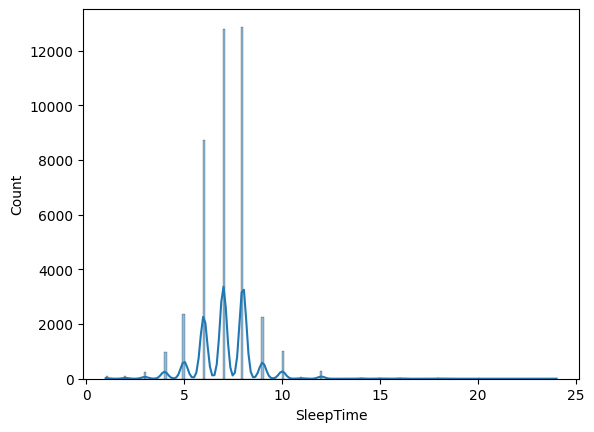

In [ ]:
# select numerical columns
num_col = df.select_dtypes(include=['int64', 'float64']).columns

# plot histogram for each columns
for col in num_col:
  sns.histplot(df[col], kde=True)
  plt.show()

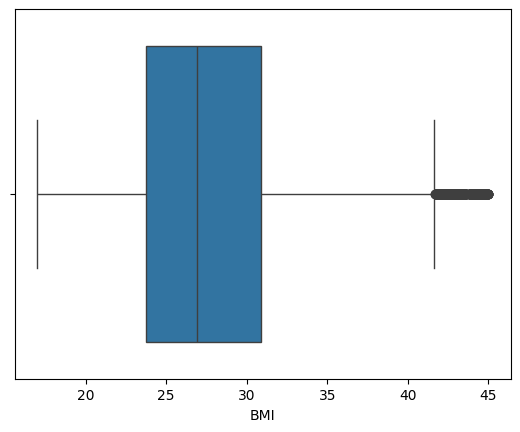

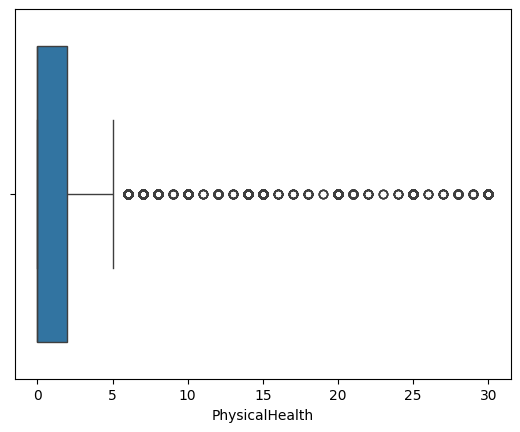

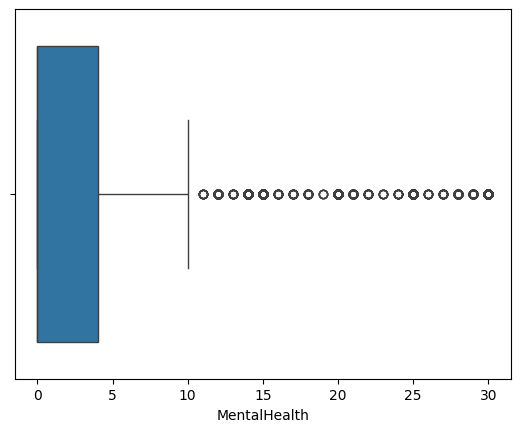

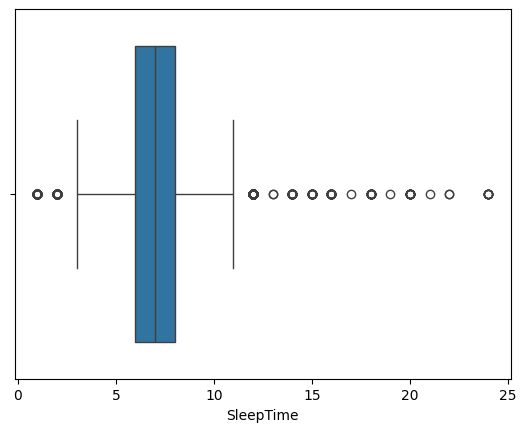

In [ ]:
# box plot for numerical columns
for col in num_col:
  sns.boxplot(x=df[col])
  plt.show()

Bin health status (physical and mental)

In [11]:
# Binning strategy
bins = [-1, 0, 5, 15, 30]
labels = ['None', 'Mild', 'Moderate', 'Severe']

# Apply to both columns
df['PhysicalHealth_Category'] = pd.cut(df['PhysicalHealth'], bins=bins, labels=labels)
df['MentalHealth_Category'] = pd.cut(df['MentalHealth'], bins=bins, labels=labels)

Cap outliers

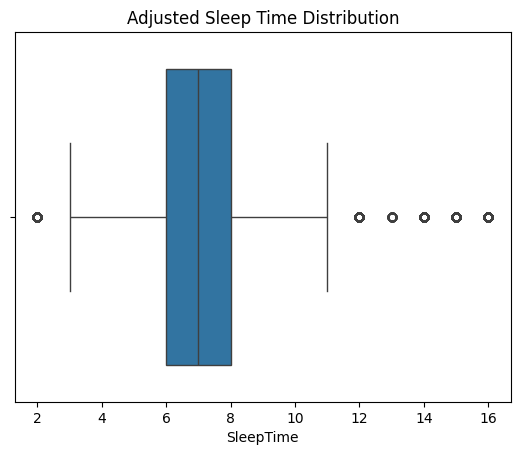

In [12]:
# Cap sleep time between 2 and 16 hours
df['SleepTime'] = df['SleepTime'].clip(lower=2, upper=16)

# Step 2: Visualize
sns.boxplot(x=df['SleepTime'])
plt.title("Adjusted Sleep Time Distribution")
plt.show()

In [ ]:
# export df as csv
df.to_csv('Health_Care_Data_Cleaned.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311919 entries, 1 to 319793
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   HeartDisease-Hypertension)  311919 non-null  int64   
 1   BMI                         311919 non-null  float64 
 2   Smoking                     311919 non-null  int64   
 3   AlcoholDrinking             311919 non-null  int64   
 4   Stroke                      311919 non-null  int64   
 5   PhysicalHealth              311919 non-null  int64   
 6   MentalHealth                311919 non-null  float64 
 7   DiffWalking                 311919 non-null  int64   
 8   Sex                         311919 non-null  int64   
 9   AgeCategory                 311919 non-null  object  
 10  Diabetic                    311919 non-null  int64   
 11  PhysicalActivity            311919 non-null  int64   
 12  GenHealth                   311919 non-null  object  
 13  Slee

# Encoding features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41921 entries, 1 to 42918
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   HeartDisease-Hypertension)  41921 non-null  object  
 1   BMI                         41921 non-null  float64 
 2   Smoking                     41921 non-null  object  
 3   AlcoholDrinking             41921 non-null  object  
 4   Stroke                      41921 non-null  object  
 5   PhysicalHealth              41921 non-null  int64   
 6   MentalHealth                41921 non-null  float64 
 7   DiffWalking                 41921 non-null  object  
 8   Sex                         41921 non-null  object  
 9   AgeCategory                 41921 non-null  object  
 10  Diabetic                    41921 non-null  object  
 11  PhysicalActivity            41921 non-null  object  
 12  GenHealth                   41921 non-null  object  
 13  SleepTime            

In [ ]:
df.head()

,HeartDisease-Hypertension),BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Tribe,BMI_category,PhysicalHealth_Category,MentalHealth_Category
1,No,20.34,No,No,Yes,0,0.0,No,Female,80 or older,...,Yes,Very good,7.0,No,No,No,Yoruba,Normal,None,None
2,No,26.58,Yes,No,No,20,30.0,No,Male,65-69,...,Yes,Fair,8.0,Yes,No,No,Yoruba,Overweight,Severe,Severe
3,No,24.21,No,No,No,0,0.0,No,Female,75-79,...,No,Good,6.0,No,No,Yes,Yoruba,Normal,None,None
4,No,23.71,No,No,No,28,0.0,Yes,Female,40-44,...,Yes,Very good,8.0,No,No,No,Yoruba,Normal,Severe,None
5,Yes,28.87,Yes,No,No,6,0.0,Yes,Female,75-79,...,No,Fair,12.0,No,No,No,Hausa Fulani,Overweight,Moderate,None


# Data Encoding

In [13]:
# unique values in a column
df['GenHealth'].value_counts()

,count
GenHealth,
Very good,112393
Good,90219
Excellent,66214
Fair,32738
Poor,10355


In [14]:
# norminal data
ordinal = ['AgeCategory','GenHealth', 'PhysicalHealth_Category', 'MentalHealth_Category']

binary = ['HeartDisease-Hypertension)', 'Smoking', 'AlcoholDrinking', 'Stroke',
          'DiffWalking', 'Sex','Diabetic', 'PhysicalActivity', 'Asthma',
          'KidneyDisease', 'SkinCancer']

norminal = ['BMI_category', 'Tribe']

# Define order for each column
ordinal_orders = {
    'AgeCategory': ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                    '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
                    '80 or older'],
    'GenHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    'PhysicalHealth_Category': ['None', 'Mild', 'Moderate', 'Severe'],
    'MentalHealth_Category': ['None', 'Mild', 'Moderate', 'Severe']
}


# One_Hot Encoding for Norminal data
import sklearn
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=norminal, drop_first=True)

# Binary encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in binary:
  df[col] = le.fit_transform(df[col])

# Label Encoding for ordinal data
from sklearn.preprocessing import OrdinalEncoder
for col in ordinal:
    encoder = OrdinalEncoder(categories=[ordinal_orders[col]])
    df[f'{col}_encoded'] = encoder.fit_transform(df[[col]])

In [ ]:
df.head()

,HeartDisease-Hypertension),BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,BMI_category_Obese,Tribe_Ibibio,Tribe_Igbo,Tribe_Other,Tribe_Tiv,Tribe_Yoruba,AgeCategory_encoded,GenHealth_encoded,PhysicalHealth_Category_encoded,MentalHealth_Category_encoded
1,0,20.34,0,0,1,0,0.0,0,0,80 or older,...,False,False,False,False,False,True,12.0,3.0,0.0,0.0
2,0,26.58,1,0,0,20,30.0,0,1,65-69,...,False,False,False,False,False,True,9.0,1.0,3.0,3.0
3,0,24.21,0,0,0,0,0.0,0,0,75-79,...,False,False,False,False,False,True,11.0,2.0,0.0,0.0
4,0,23.71,0,0,0,28,0.0,1,0,40-44,...,False,False,False,False,False,True,4.0,3.0,3.0,0.0
5,1,28.87,1,0,0,6,0.0,1,0,75-79,...,False,False,False,False,False,False,11.0,1.0,2.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311919 entries, 1 to 319793
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   HeartDisease-Hypertension)       311919 non-null  int64  
 1   Smoking                          311919 non-null  int64  
 2   AlcoholDrinking                  311919 non-null  int64  
 3   Stroke                           311919 non-null  int64  
 4   DiffWalking                      311919 non-null  int64  
 5   Sex                              311919 non-null  int64  
 6   Diabetic                         311919 non-null  int64  
 7   PhysicalActivity                 311919 non-null  int64  
 8   SleepTime                        311919 non-null  float64
 9   Asthma                           311919 non-null  int64  
 10  KidneyDisease                    311919 non-null  int64  
 11  SkinCancer                       311919 non-null  int64  
 12  BMI_cat

In [15]:
df['AgeCategory_encoded'].value_counts()

,count
AgeCategory_encoded,
9.0,33403
8.0,32884
10.0,30516
7.0,28955
6.0,24644
12.0,23849
11.0,21176
5.0,21043
0.0,20577


Correlation analysis

In [16]:
# delete unneeded columns
column = ['BMI', 'PhysicalHealth', 'MentalHealth', 'PhysicalHealth_Category',
          'MentalHealth_Category', 'AgeCategory', 'GenHealth']
df = df.drop(column, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311919 entries, 1 to 319793
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   HeartDisease-Hypertension)       311919 non-null  int64  
 1   Smoking                          311919 non-null  int64  
 2   AlcoholDrinking                  311919 non-null  int64  
 3   Stroke                           311919 non-null  int64  
 4   DiffWalking                      311919 non-null  int64  
 5   Sex                              311919 non-null  int64  
 6   Diabetic                         311919 non-null  int64  
 7   PhysicalActivity                 311919 non-null  int64  
 8   SleepTime                        311919 non-null  float64
 9   Asthma                           311919 non-null  int64  
 10  KidneyDisease                    311919 non-null  int64  
 11  SkinCancer                       311919 non-null  int64  
 12  BMI_cat

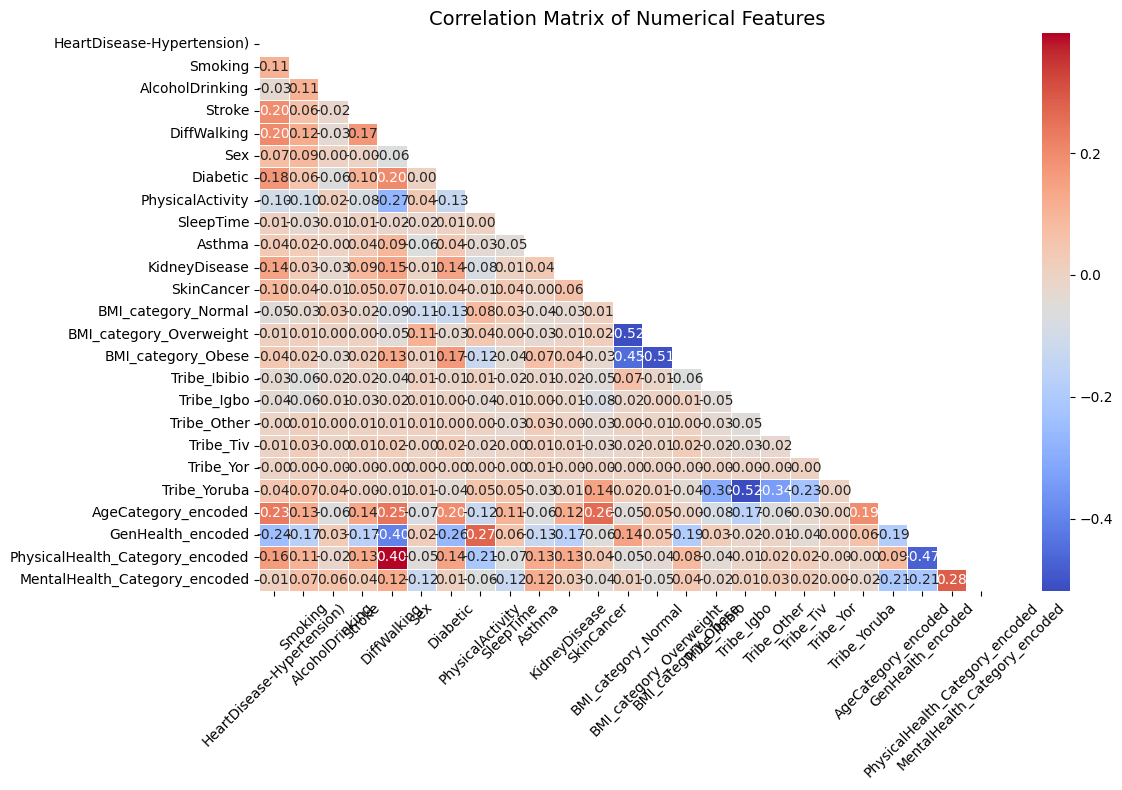

In [ ]:
# Calculate correlation matrix once
corr_matrix = df.corr()

# Plot a single heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",  # Show 2 decimal places
            linewidths=0.5,
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))  # Mask upper triangle
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Model Building

In [17]:
from sklearn.model_selection import train_test_split

# Features
x = df.drop('HeartDisease-Hypertension)', axis=1)

# Target
y = df['HeartDisease-Hypertension)']

# split into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Logistic Regresssion Model

Class Balance

In [18]:
from sklearn.linear_model import LogisticRegression

# assign a higher weight to the minority class (hypertention)
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# prediction
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Accuracy: {accuracy}")
print(f"AUC-ROC: {roc_auc}")
print(f"Confusion Matrix:\n {confusion}")
print(f"Classification Report:\n {classification_rep}")

Accuracy: 0.752885355219287
AUC-ROC: 0.8395638331543347
Confusion Matrix:
 [[42914 14278]
 [ 1138  4054]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.85     57192
           1       0.22      0.78      0.34      5192

    accuracy                           0.75     62384
   macro avg       0.60      0.77      0.60     62384
weighted avg       0.91      0.75      0.81     62384



Feature Importance for Logistic Regression

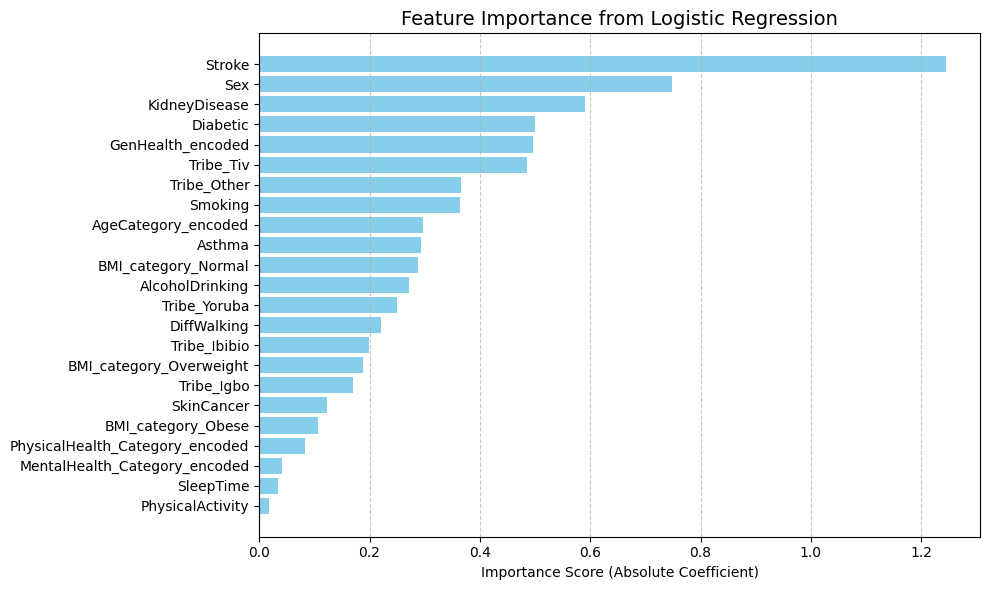

In [20]:
# Feature importance = absolute coefficient values
importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': abs(model.coef_[0])
}).sort_values('Importance', ascending=False)

# Sort features by importance
importance = importance.sort_values('Importance', ascending=False)

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'], importance['Importance'], color='skyblue')
plt.xlabel('Importance Score (Absolute Coefficient)')
plt.title('Feature Importance from Logistic Regression', fontsize=14)
plt.gca().invert_yaxis()  # Show most important at top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Random Forest

Handle Class Balance

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight = 'balanced', n_estimators=100, random_state = 42)

Train Model

In [22]:
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Model Evaluation

In [23]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# result
print(f"Accuracy: {accuracy}")
print(f"AUC-ROC: {roc_auc}")
print(f"Confusion Matrix:\n {confusion}")
print(f"Classification Report:\n {classification_rep}")

Accuracy: 0.8656706847909721
AUC-ROC: 0.7536770924193176
Confusion Matrix:
 [[52842  4350]
 [ 4030  1162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     57192
           1       0.21      0.22      0.22      5192

    accuracy                           0.87     62384
   macro avg       0.57      0.57      0.57     62384
weighted avg       0.87      0.87      0.87     62384



Applying SMOTE to correct imbalance

In [24]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Verify new class distribution
print("Class distribution after SMOTE:", pd.Series(y_resampled).value_counts())

Class distribution after SMOTE: HeartDisease-Hypertension)
0    228187
1    228187
Name: count, dtype: int64


Train model

In [25]:
model.fit(x_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

Model Evaluation

In [26]:
# prediction
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Accuracy: {accuracy}")
print(f"AUC-ROC: {roc_auc}")
print(f"Confusion Matrix:\n {confusion}")
print(f"Classification Report:\n {classification_rep}")

Accuracy: 0.8502500641190048
AUC-ROC: 0.7659430498592473
Confusion Matrix:
 [[51417  5775]
 [ 3567  1625]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     57192
           1       0.22      0.31      0.26      5192

    accuracy                           0.85     62384
   macro avg       0.58      0.61      0.59     62384
weighted avg       0.88      0.85      0.86     62384



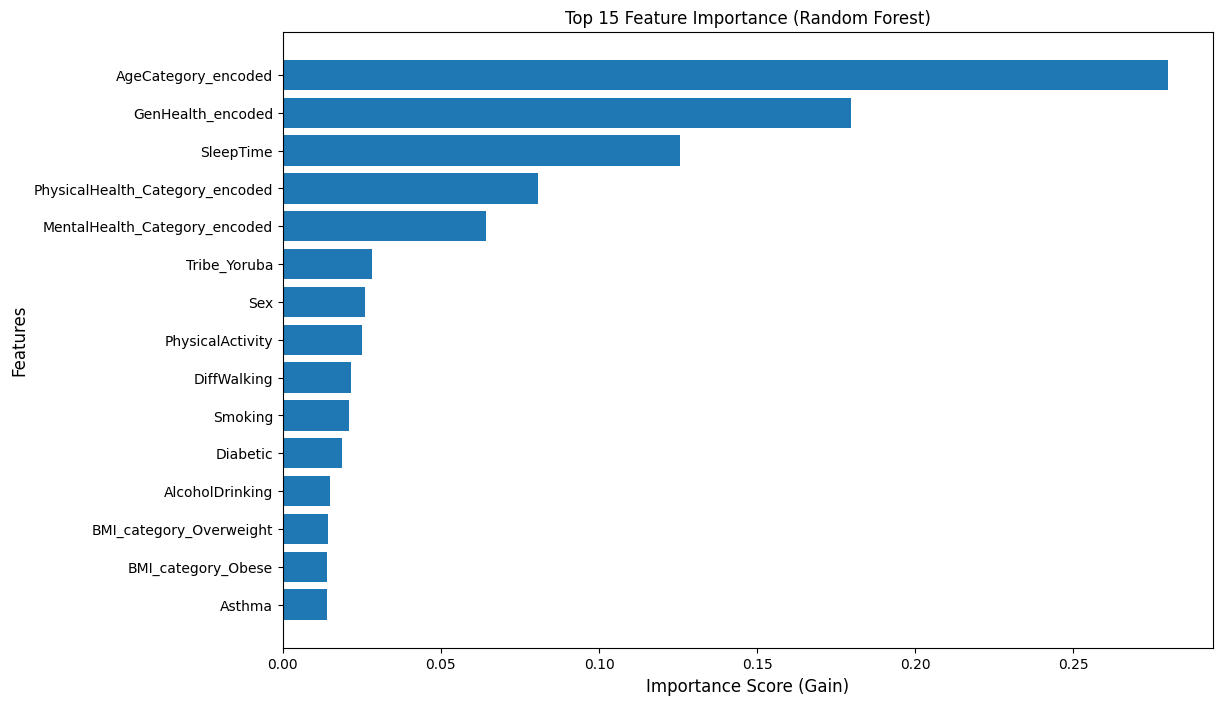

In [27]:
# Get importance scores and feature names
importance = model.feature_importances_
feature_names = x_resampled.columns  # Replace with actual feature names if needed

# Create DataFrame
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(
    feature_importance['Feature'][:15],  # Plot top 15 features
    feature_importance['Importance'][:15]
)
plt.xlabel('Importance Score (Gain)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

In [28]:
import xgboost as xgb

model = xgb.XGBClassifier(
    scale_pos_weight=10,  # Penalize missing Class 1 by 10x
    objective='binary:logistic',
    eval_metric='auc'
)
model.fit(x_resampled, y_resampled)

# prediction
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Accuracy: {accuracy}")
print(f"AUC-ROC: {roc_auc}")
print(f"Confusion Matrix:\n {confusion}")
print(f"Classification Report:\n {classification_rep}")

Accuracy: 0.5526256732495511
AUC-ROC: 0.7938150877071604
Confusion Matrix:
 [[29839 27353]
 [  556  4636]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.52      0.68     57192
           1       0.14      0.89      0.25      5192

    accuracy                           0.55     62384
   macro avg       0.56      0.71      0.47     62384
weighted avg       0.91      0.55      0.65     62384



In [29]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Calculate class weight
minority_count = sum(y_train == 1)
majority_count = sum(y_train == 0)
scale_pos_weight = majority_count / minority_count

# Train model
model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    tree_method='hist'
)
model.fit(x_resampled, y_resampled)

y_prob = model.predict_proba(x_test)[:, 1]  # Probabilities for Class 1
y_pred = (y_prob > 0.5).astype(int)         # Increase threshold from 0.5 → 0.6

# Metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Accuracy: {accuracy}")
print(f"AUC-ROC: {roc_auc}")
print(f"Confusion Matrix:\n {confusion}")
print(f"Classification Report:\n {classification_rep}")

Accuracy: 0.542671197743011
AUC-ROC: 0.794245505057869
Confusion Matrix:
 [[29191 28001]
 [  529  4663]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.51      0.67     57192
           1       0.14      0.90      0.25      5192

    accuracy                           0.54     62384
   macro avg       0.56      0.70      0.46     62384
weighted avg       0.91      0.54      0.64     62384



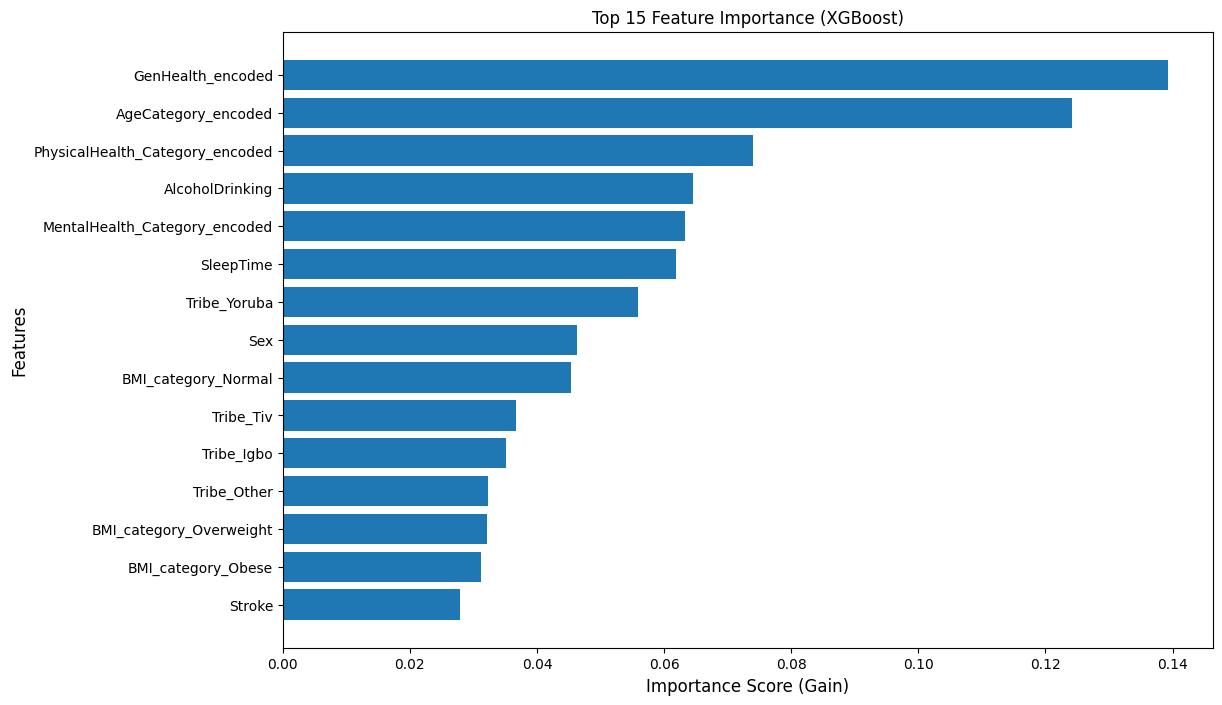

In [30]:
# Get importance scores and feature names
importance = model.feature_importances_
feature_names = x_resampled.columns  # Replace with actual feature names if needed

# Create DataFrame
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(
    feature_importance['Feature'][:15],  # Plot top 15 features
    feature_importance['Importance'][:15]
)
plt.xlabel('Importance Score (Gain)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Feature Importance (XGBoost)')
plt.gca().invert_yaxis()
plt.show()

Further threshold turning

In [ ]:
thresholds = [0.5, 0.6, 0.7, 0.8]
for thresh in thresholds:
    y_pred = (y_prob > thresh).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"Accuracy: {accuracy}")
    print(f"AUC-ROC: {roc_auc}")
    print(f"Confusion Matrix:\n {confusion}")
    print(f"Classification Report:\n {classification_rep}")

Accuracy: 0.5603336173265773
AUC-ROC: 0.8001081251589828
Confusion Matrix:
 [[21567 19210]
 [  400  3425]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.53      0.69     40777
           1       0.15      0.90      0.26      3825

    accuracy                           0.56     44602
   macro avg       0.57      0.71      0.47     44602
weighted avg       0.91      0.56      0.65     44602

Accuracy: 0.6197031523250078
AUC-ROC: 0.8001081251589828
Confusion Matrix:
 [[24352 16425]
 [  537  3288]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.60      0.74     40777
           1       0.17      0.86      0.28      3825

    accuracy                           0.62     44602
   macro avg       0.57      0.73      0.51     44602
weighted avg       0.91      0.62      0.70     44602

Accuracy: 0.6736917627012241
AUC-ROC: 0.8001081251589828
Confusion Matrix:
 [[26975 

In [ ]:
from joblib import dump, load

# Save model
dump(model, 'hypertension_model.pkl')

['hypertension_model.pkl']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311919 entries, 1 to 319793
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   HeartDisease-Hypertension)       311919 non-null  int64  
 1   Smoking                          311919 non-null  int64  
 2   AlcoholDrinking                  311919 non-null  int64  
 3   Stroke                           311919 non-null  int64  
 4   DiffWalking                      311919 non-null  int64  
 5   Sex                              311919 non-null  int64  
 6   Diabetic                         311919 non-null  int64  
 7   PhysicalActivity                 311919 non-null  int64  
 8   SleepTime                        311919 non-null  float64
 9   Asthma                           311919 non-null  int64  
 10  KidneyDisease                    311919 non-null  int64  
 11  SkinCancer                       311919 non-null  int64  
 12  BMI_cat

# Model Deployment

In [ ]:
df = pd.read_csv('Health_Care_Data_Cleaned.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311919 entries, 0 to 311918
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HeartDisease-Hypertension)  311919 non-null  object 
 1   BMI                         311919 non-null  float64
 2   Smoking                     311919 non-null  object 
 3   AlcoholDrinking             311919 non-null  object 
 4   Stroke                      311919 non-null  object 
 5   PhysicalHealth              311919 non-null  int64  
 6   MentalHealth                311919 non-null  float64
 7   DiffWalking                 311919 non-null  object 
 8   Sex                         311919 non-null  object 
 9   AgeCategory                 311919 non-null  object 
 10  Diabetic                    311919 non-null  object 
 11  PhysicalActivity            311919 non-null  object 
 12  GenHealth                   311919 non-null  object 
 13  SleepTime     

In [ ]:
# unique values in a column
df['PhysicalHealth_Category'].value_counts()

,count
PhysicalHealth_Category,
Mild,44687
Severe,24386
Moderate,20266


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('hypertension_model.pkl')

# App title and description
st.title("Hypertension Risk Prediction")
st.markdown("Predict hypertension risk based on health and demographic factors")

def user_input_features():
    st.sidebar.header("Patient Input Features")

    # ====== Collect Inputs ======
    # Demographic Info
    age = st.sidebar.selectbox("Age", ["18-24", "25-29", "30-34", "35-39", "40-44",
                                  "45-49", "50-54", "55-59", "60-64", "65-69",
                                  "70-74", "75-79", "80+"])
    sex = st.sidebar.radio("Sex", ["Male", "Female"])
    tribe = st.sidebar.selectbox("Tribe", ["Ibibio", "Igbo", "Yoruba", "Tiv", "Hausa Fulani", "Other"])

    # Health Behaviors
    PhysicalActivity = st.sidebar.radio("Physical Activity", ["Yes", "No"])
    bmi_category = st.sidebar.selectbox("BMI Category", ["Normal", "Overweight", "Obese"])
    gen_health = st.sidebar.selectbox("General Health", ["Poor", "Fair", "Good", "Very good", "Excellent"])

    # Health Metrics
    PhysicalHealth = st.sidebar.number_input("Physical Health (Last 30 Days)", 0, 30, 5)
    MentalHealth = st.sidebar.number_input("Mental Health (Last 30 Days)", 0, 30, 5)
    sleep_time = st.sidebar.number_input("Sleep Time (hours)", 2, 16, 7)

    # Medical History
    alcohol = st.sidebar.radio("Alcohol Drinking", ["No", "Yes"])
    smoking = st.sidebar.radio("Smoking Status", ["No", "Yes"])
    skin_cancer = st.sidebar.radio("Skin Cancer", ["No", "Yes"])
    diabetics = st.sidebar.radio("Diabetic", ["No", "Yes"])
    diff_walking = st.sidebar.radio("Difficulty Walking", ["No", "Yes"])
    asthma = st.sidebar.radio("Asthma", ["No", "Yes"])
    kidney_disease = st.sidebar.radio("Kidney Disease", ["No", "Yes"])
    stroke = st.sidebar.radio("History of Stroke", ["No", "Yes"])

    # ====== Encode Inputs ======
    # Age Category Encoding (example mapping - verify with your training data)
    age_mapping = {
        "18-24": 0, "25-29": 1, "30-34": 2, "35-39": 3,
        "40-44": 4, "45-49": 5, "50-54": 6, "55-59": 7,
        "60-64": 8, "65-69": 9, "70-74": 10, "75-79": 11, "80+": 12
    }

    # General Health Encoding
    gen_health_mapping = {
        "Poor": 0, "Fair": 1, "Good": 2, "Very good": 3, "Excellent": 4
    }

    # Physical/Mental Health Category Encoding
    def health_category_encoder(value):
        if value < 5: return 0      # None
        elif 5 <= value < 10: return 1  # Mild
        elif 10 <= value < 20: return 2 # Moderate
        else: return 3               # Severe

    input_data = {
        # Binary Features
        "Smoking": 1 if smoking == "Yes" else 0,
        "AlcoholDrinking": 1 if alcohol == "Yes" else 0,
        "Stroke": 1 if stroke == "Yes" else 0,
        "DiffWalking": 1 if diff_walking == "Yes" else 0,
        "Sex": 1 if sex == "Male" else 0,
        "Diabetic": 1 if diabetics == "Yes" else 0,
        "PhysicalActivity": 1 if PhysicalActivity == "Yes" else 0,
        "SleepTime": sleep_time,
        "Asthma": 1 if asthma == "Yes" else 0,
        "KidneyDisease": 1 if kidney_disease == "Yes" else 0,
        "SkinCancer": 1 if skin_cancer == "Yes" else 0,

        # BMI Categories (one-hot encoded)
        "BMI_category_Normal": 1 if bmi_category == "Normal" else 0,
        "BMI_category_Overweight": 1 if bmi_category == "Overweight" else 0,
        "BMI_category_Obese": 1 if bmi_category == "Obese" else 0,

        # Tribe (one-hot encoded)
        "Tribe_Ibibio": 1 if tribe == "Ibibio" else 0,
        "Tribe_Igbo": 1 if tribe == "Igbo" else 0,
        "Tribe_Other": 1 if tribe in ["Hausa Fulani", "Other"] else 0,
        "Tribe_Tiv": 1 if tribe == "Tiv" else 0,
        "Tribe_Yoruba": 1 if tribe == "Yoruba" else 0,

        # Encoded Numerical Features
        "AgeCategory_encoded": age_mapping[age],
        "GenHealth_encoded": gen_health_mapping[gen_health],
        "PhysicalHealth_Category_encoded": health_category_encoder(PhysicalHealth),
        "MentalHealth_Category_encoded": health_category_encoder(MentalHealth)
    }

    return pd.DataFrame(input_data, index=[0])

# Get user input
input_df = user_input_features()

# Display input data
st.subheader("Patient Input Data")
st.write(input_df)

# Predict
prediction = model.predict(input_df)
pred_prob = model.predict_proba(input_df)[:, 1][0]

# Display results
st.subheader("Prediction")
st.write(f"**Probability of Hypertension:** {pred_prob:.2%}")
st.write(f"**Predicted Class:** {'High Risk' if prediction[0] == 1 else 'Low Risk'}")

2025-04-12 13:08:12.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 13:08:12.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 13:08:12.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 13:08:12.281 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 13:08:12.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 13:08:12.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 13:08:12.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 13:08:12.287 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar